# K-space

MRI is a so-called Fourier imaging technique, where data is acquired in the Fourier Transform domain.  The Fourier Transform domain is referred to as "k-space".  This section describes the how to characterize MRI spatial encoding using k-space and introduces the concept of k-space trajectories for sampling data.

## Learning Goals

1. Describe how images are formed
    * Understand why MRI is a Fourier imaging method
    * Describe how MRI data is accumulated and sorted
    * Describe what a k-space trajectory is



For constant gradients, $\vec{G}(t) = \vec{G}_0$, this variation in frequency can be described by (neglecting relaxation)

$$\begin{align}
M_{XY}(\vec{r},t) & =  M_{XY}(\vec{r},0) \exp(-t/T_2(\vec{r})) \exp\left( -i \gamma \vec{G}_0 \cdot \vec{r} \ t \right) \\ 
& \approx M_{XY}(\vec{r}, 0) \exp\left( -i \gamma \vec{G}_0 \cdot \vec{r} \ t \right)
\end{align}$$


For general time-varying gradients, their effect is to create phase accumulation depending on the cumulative gradient area, or the integral of the gradient.  This means we can turn the gradients on and off to start and stop the phase accumulation, and also reverse the gradient polarity to undo any prior phase accumulation.  

$$M_{XY}(\vec{r}, t) = M_{XY}(\vec{r}, 0) \exp\left( -i \gamma \int_0^t \vec{G}(\tau) \cdot \vec{r} \ d\tau \right)$$ 


## k-space

Here, we introduce the concept of k-space, which is a simplified representation of the phase accumulation due to magnetic field gradients.  It is defined as

$$\vec{k}(t) = [k_X(t), k_Y(t), k_Z(t)]^T = \frac{\gamma}{2\pi} \int_0^t \vec{G}(\tau) \cdot \vec{r} \ d\tau$$ 

The effect of gradients on the transverse magnetization then becomes

$$M_{XY}(\vec{r}, t) = M_{XY}(\vec{r}, 0) e^{ -i 2 \pi \vec{k}(t) \cdot \vec{r} }$$ 

The specific motivation for k-space will become apparent soon, when we formulate the signal equation and see that there is a Fourier Transform.

## MRI signal

The MRI signal comes from the precession of the transverse magnetization, and thus is proportional to the transverse magnetization.  The MRI signal also comes from any precessing magnetization within the sensitive volume of the RF receive coils.  In other words, it is also not localized to a single location, but rather is summed over a volume:

$$\begin{align}
s(t) & = \int_\mathrm{Volume} M_{XY}(\vec{r},t) \ d\vec{r} \\
 & =  \int_{\textrm{Volume}} M_{XY}(\vec{r},0) \exp(-i2\pi \vec{k}(t) \cdot \vec{r}) \ d\vec{r}
 \end{align}$$ 

The amazing result here is that this describes our MRI signal in the form of a Fourier Transform:

$$\mathcal{F} \{ f(\vec{r}) \} = F(\vec{k}) = \int_{-\infty}^\infty f(\vec{r}) \exp(-i 2 \pi \vec{k} \cdot  \vec{r}) \ d\vec{r}$$

 This is the power of the k-space representation, that it describes how MRI is sampling data in the Fourier Transform domain, or the spatial frequency domain, of the object net magnetization.  In other words, MRI signals are a measure of the spatial frequencies of our object.  

This result means that, to reconstruct an image we need to put our MRI signals into their k-space location based on the applied gradients, and then use an inverse Fourier Transform.
Our signal is the Fourier Transform of the initial transverse magnetization, evaluated at a spatial frequnecy, $\vec{k}$, that is determined by the k-space trajectory, $\vec{k}(t)$:

$$ s(t) = \mathcal{F} \{ M_{XY}(\vec{r},0) \} |_{\vec{k} = \vec{k}(t)} $$
 

## From MRI data to images

First we use the following notation for simplification

$$m(\vec{r}) = M_{XY}(\vec{r},0)$$

$$\mathcal{F}\{ m(\vec{r}) \} = M(\vec{k})$$

The flow of the experiment and data is as follows:

1. RF excitation to create transverse magnetization, $M_{XY}(\vec{r},0)$
1. Gradients applied as $\vec{G}(t)$ and data is acquired
1. k-space locations, $\vec{k}(t)$, are determined based on the applied gradients
1. MR signal acquired represents the Fourier Transform of the transverse magnetization at the k-space location: $ s(t) = M(\vec{k}(t))$
1. MR signal over time is stored in a data matrix with known k-space locations to create $M(\vec{k})$
1. Inverse Fourier Transform is applied to reconstruct an image of the transverse magnetization $\mathcal{F}^{-1}\{ M(\vec{k} )\} = m(\vec{r})$

We have now have the incredible result that we used magnetic field gradients, the k-space framework, and appropriate acquisition and ordering of the MR signal to create an **IMAGE**!!

## K-space Trajectories

K-space is a very general method for capturing the effect of spatial encoding gradients, and the "k-space trajectory" is defined as the pattern created over time by the gradients:

$$\vec{k}(t) = \frac{\gamma}{2\pi} \int_0^t \vec{G}(\tau) d\tau$$

Note that k-space trajectories always start at the center of k-space, $\vec{k}(0) = 0$ and are only defined once there is transverse magnetization (e.g. after an RF pulse).

The following simulation of the net magnetizations shows how rotations and k-space trajectory during a typical Cartesian (or 2D FT) gradient pulse sequence, which is differs from the simulation above in that an initial dephasing gradient in the frequency encoding direction is applied to sample both positive and negative spatial frequencies in k-space:

![frequency_phase_encoding-full-Mxy.gif](images/frequency_phase_encoding-full-Mxy.gif)

![frequency_phase_encoding-full-image_phase.gif](images/frequency_phase_encoding-full-image_phase.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)

### K-space trajectories

The k-space pattern during a MRI experiment is referred to as the k-space "trajectory".  The most common are Cartesian trajectories, in which parallel lines of k-space are covered to sample a 2D (or 3D) grid.  K-space trajectories with other patterns, such as radial lines, spirals, rastered lines (echo-planar trajectories), or blades can also be used. 

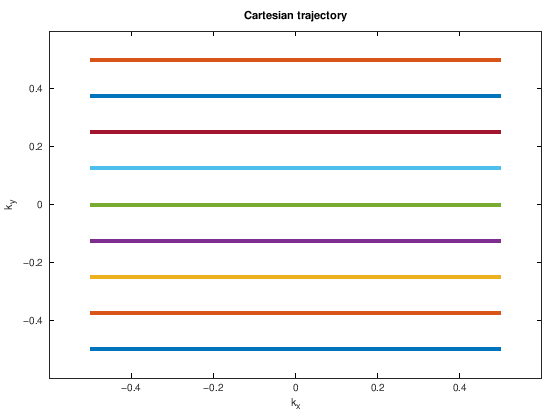

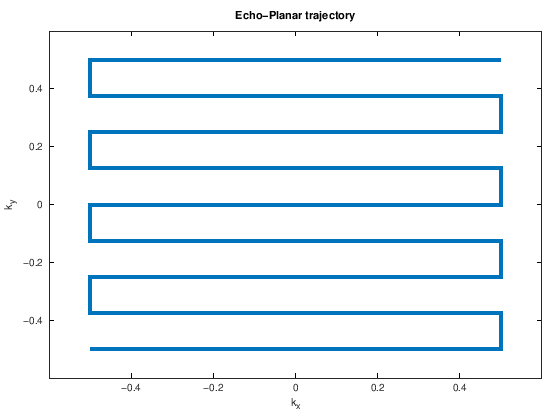

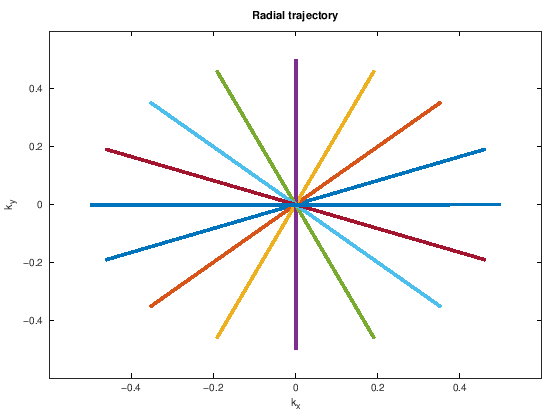

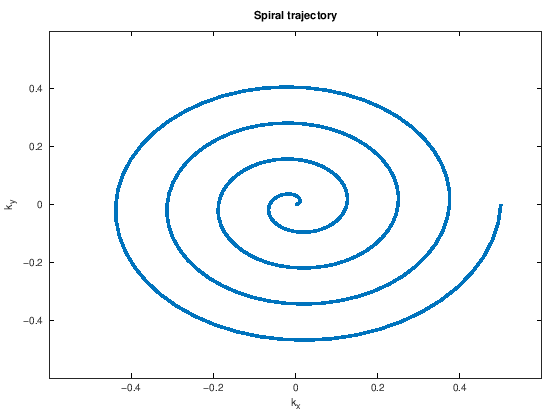

In [18]:
%  plot 2D k-space trajectories

% Cartesian
N = 8;

k = [-N/2:N/2]/N;
[ky,kx] = meshgrid(k,k);

figure
plot(kx, ky, 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Cartesian trajectory')

% echo-planar
kx_ep = kx; kx_ep(:,2:2:end) = kx_ep(end:-1:1,2:2:end);
kx_ep = kx_ep(:);

ky_ep = ky(:);

figure
plot(kx_ep, ky_ep, 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Echo-Planar trajectory')

% radial

k_theta = exp(i*2*pi*[1:N]/(2*N));
k_radial = k.' * k_theta;

figure
plot(real(k_radial), imag(k_radial), 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Radial trajectory')


% spiral
n = linspace(0,1,201);
Nturns = N/2;
k_spiral = 1/2*n.*exp(i*2*pi*Nturns*n);

figure
plot(real(k_spiral), imag(k_spiral), 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Spiral trajectory')



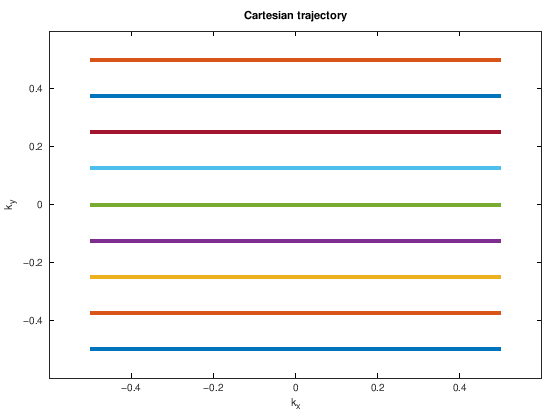

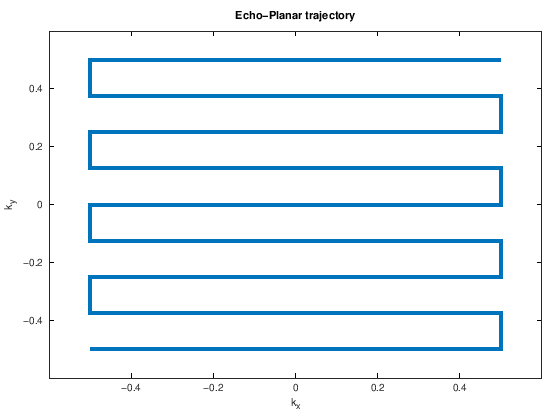

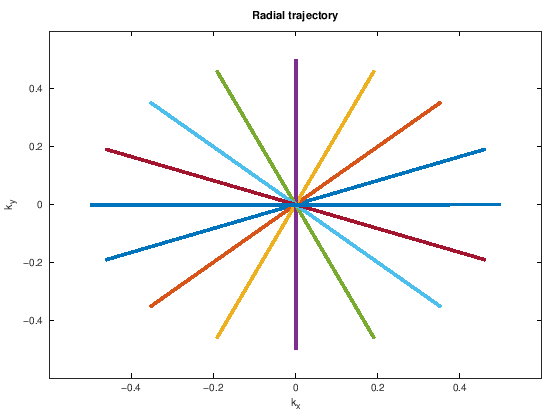

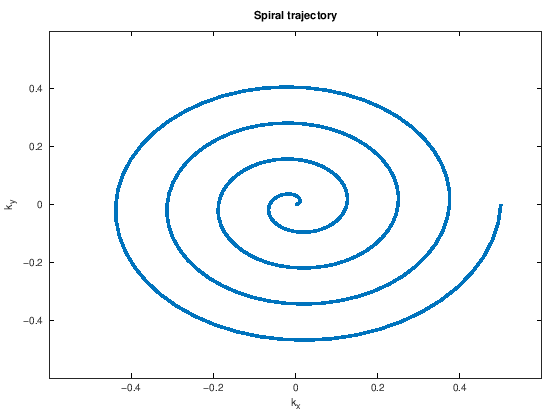

In [ ]:
%  plot 3D k-space trajectories

% Cartesian
N = 8;

k = [-N/2:N/2]/N;
[ky,kx,kz] = meshgrid(k,k,k);


figure
plot3(reshape(kx, [N+1 (N+1)^2]), reshape(ky, [N+1 (N+1)^2]), reshape(kz, [N+1 (N+1)^2]), 'LineWidth',10)
xlim([-.6 .6]), ylim([-.6 .6]), zlim([-.6 .6])
xlabel('k_x'),ylabel('k_y'), zlabel('k_z')
title('Cartesian trajectory')

% radial

N_radial = N^3;

n = 1:N_radial;

kz = (2*n - N_radial - 1) / N_radial;
kx = cos(sqrt(N_radial*pi) .* asin(kz)) .* sqrt(1-kz.^2);
ky = sin(sqrt(N_radial*pi) .* asin(kz)) .* sqrt(1-kz.^2);

figure
plot3([zeros(1,N_radial); kx], [zeros(1,N_radial); ky], [zeros(1,N_radial); kz])
xlim([-.6 .6]), ylim([-.6 .6]), zlim([-.6 .6])
xlabel('k_x'),ylabel('k_y'), zlabel('k_z')
title('Radial trajectory')

These movies illustrate the phase accumulation during non-Cartesian trajectories

![radial_encoding-full-Mxy.gif](images/radial_encoding-full-Mxy.gif)

![spiral_encoding-full-Mxy.gif](images/spiral_encoding-full-Mxy.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)